### 1. Importación de Librerías y Carga de Datos

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ruta_archivo = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df = pd.read_excel(ruta_archivo)

### 2. Exploración Inicial de los Datos

In [40]:
# La cantidad de filas y columnas en DataFrame

df.shape

(6969, 23)

In [41]:
# Los nombres de columnas

df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

### 3. Análisis de Valores Faltantes


In [42]:
# Para analizar la cantidad y el porcentaje de valores faltantes (NaN) en cada columna de un DataFrame 

df_nan = df.isna().sum()
percent = df_nan * 100 / len(df)
missing_values = pd.DataFrame({'Missing values': df_nan, 'Missing %': percent})
missing_values

,Missing values,Missing %
Date,25,0.358732
Year,27,0.387430
Type,43,0.617018
Country,75,1.076195
State,507,7.275075
Location,590,8.466064
Activity,611,8.767398
Name,245,3.515569
Sex,604,8.666954
Age,3019,43.320419


### 4. Preprocesamiento de Datos


In [43]:
# Eliminar espacios en blanco y convertir todos los nombres de columna a minúsculas
df.columns = df.columns.str.strip().str.lower()


In [44]:
# Seleccionar varias columnas y mostrar una muestra aleatoria de 5 filas
df[['date', 'year', 'type', 'country', 'state', 'location', 'activity', 'name', 'sex', 'age', 'injury', 'unnamed: 11', 'source', 'pdf', 'href formula', 'href', 'case number', 'case number.1', 'original order']].sample(5)

,date,year,type,country,state,location,activity,name,sex,age,injury,unnamed: 11,source,pdf,href formula,href,case number,case number.1,original order
2628,10-Sep-2000,2000.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Dyer Island,Free diving,Gary Adkison,M,48,Swim fin bitten,N,"E. Ritter, GSAF",2000.09.10.a-Adkinson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.09.10.a,2000.09.10.a,4314.0
2506,23-Nov-2001,2001.0,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock Beach, Lennox Head",Surfing,Roger Frankland,M,49,"No Injury, shark hit board",N,"T. Peake, GSAF",2001.11.23-Frankland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2001.11.23,2001.11.23,4436.0
4419,13-Sep-1962,1962.0,Unprovoked,SOUTH ATLANTIC OCEAN,Off coast of West Africa,Off the passenger liner Stirling Castle,"When a deckhand jumped overboard, McIver div...",John MacIver,M,29,"FATAL, he died within minutes of being hauled ...",Y,"Daily Express (London), et. al, 9/22/1962",1962.09.13-MacIver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.09.13,1962.09.13,2523.0
4805,1958,1958.0,Unprovoked,PAPUA NEW GUINEA,Morobe Province,"Korem, Finschhafen","Fishing, holding fish",male x 3,M,NaN,Hand holding the fish was bitten in all 3 cases,N,"A.D. Campbell; A. M. Rapson, p.149",1958.00.00.c-Korem.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1958.00.00.c,1958.00.00.c,2137.0
6194,Early 1900s,1900.0,Unprovoked,USA,Hawaii,"Inter-Island Dry Dock at Kakaako Street, Honol...",NaN,Emil A. Berndt,M,NaN,Severe abrasion when shark swam between his legs,N,"G. H. Balazs; J. Borg, p.69; L. Taylor (1993),...",1900.00.00.b-Berndt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1900.00.00.b,1900.00.00.b,749.0


In [45]:
# Eliminar todas las columnas que no contienen información relevante para nuestras hipótesis. 
df.drop(["state", "location", "activity", "name", "age", "injury", "source", "pdf", "href formula","href", "case number", "case number.1", "original order", "unnamed: 21", "unnamed: 22", "time", "species"], axis=1, inplace=True)

In [46]:
# Cambiar el nombre de la columna 'unnamed: 11' a 'new_name'
df.rename(columns={'unnamed: 11': 'fatal attack: yes/no'}, inplace=True)

In [47]:
df.columns

Index(['date', 'year', 'type', 'country', 'sex', 'fatal attack: yes/no'], dtype='object')

### 5. Filtrado de Datos

In [48]:
# Crear una serie booleana donde cada valor es True si el año en la columna 'Year' es mayor o igual a 1994 y False en caso contrario.
# Filtra el DataFrame df para conservar solo las filas donde el año cumple con la condición (mayor o igual a 1994).
df = df[df['year'] >= 1994]

In [49]:
# Verifica el rango de los años en el DataFrame filtrado
min_year = df['year'].min()
max_year = df['year'].max()

print(f"Rango de años en el DataFrame filtrado: {min_year} - {max_year}")

Rango de años en el DataFrame filtrado: 1994.0 - 2024.0


### 6. Limpieza de Datos

In [50]:
# Eliminar filas con datos nulos en cualquier columna
df_cleaned_all = df.dropna()

# Mostrar el DataFrame después de eliminar filas con nulos en cualquier columna
print("\nDataFrame después de eliminar filas con datos nulos en cualquier columna:")
df_cleaned_all


DataFrame después de eliminar filas con datos nulos en cualquier columna:


,date,year,type,country,sex,fatal attack: yes/no
1,04 Mar 2024,2024.0,Unprovoked,USA,M,N
2,02 Mar-2024,2024.0,Unprovoked,USA,F,N
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,F,N
4,14 Feb-2024,2024.0,Unprovoked,INDIA,M,N
5,04-Feb-2024,2024.0,Provoked,TRINIDAD,M,N
...,...,...,...,...,...,...
3071,30-Jan-1994,1994.0,Unprovoked,SOUTH AFRICA,M,N
3073,09-Jan-1994,1994.0,Unprovoked,AUSTRALIA,M,N
3074,03-Jan-1994,1994.0,Unprovoked,SOUTH AFRICA,M,N
3075,Last incident of 1994 in Hong Kong,1994.0,Unprovoked,HONG KONG,F,N


### 7. Corrección de Valores en la Columna 'sex'

In [51]:
valores_unicos = df['sex'].unique()

print(valores_unicos)

['F' 'M' nan ' M' 'M ' 'lli']


In [52]:
# Contar valores NaN
cantidad_nan = df['sex'].isna().sum()

# Contar apariciones del valor 'lli'
cantidad_lli = (df['sex'] == 'lli').sum()

print(f"Cantidad de NaN: {cantidad_nan}")
print(f"Cantidad de 'lli': {cantidad_lli}")

Cantidad de NaN: 150
Cantidad de 'lli': 1


In [53]:
import numpy as np

# Primero, eliminamos espacios en blanco en los valores
df['sex'] = df['sex'].str.strip()

# Reemplazar valores no válidos como 'lli' con NaN
df['sex'] = df['sex'].replace('lli', np.nan)

# Eliminar filas donde 'sex' es NaN (si no quieres considerar estos datos)
df = df.dropna(subset=['sex'])

# Contar ocurrencias de cada valor en la columna 'sex'
value_counts = df['sex'].value_counts()

# Mostrar conteo de valores específicos
print("Conteo de cada valor en la columna 'sex':")
print(value_counts)

Conteo de cada valor en la columna 'sex':
sex
M    2394
F     530
Name: count, dtype: int64


In [54]:
df['year'] = df['year'].astype(int)

### 8. Análisis y Visualización de Datos

Número total de ataques por genero:
sex
M    2131
F     477
Name: count, dtype: int64

Proporción de ataques por genero:
sex
M    0.817101
F    0.182899
Name: count, dtype: float64


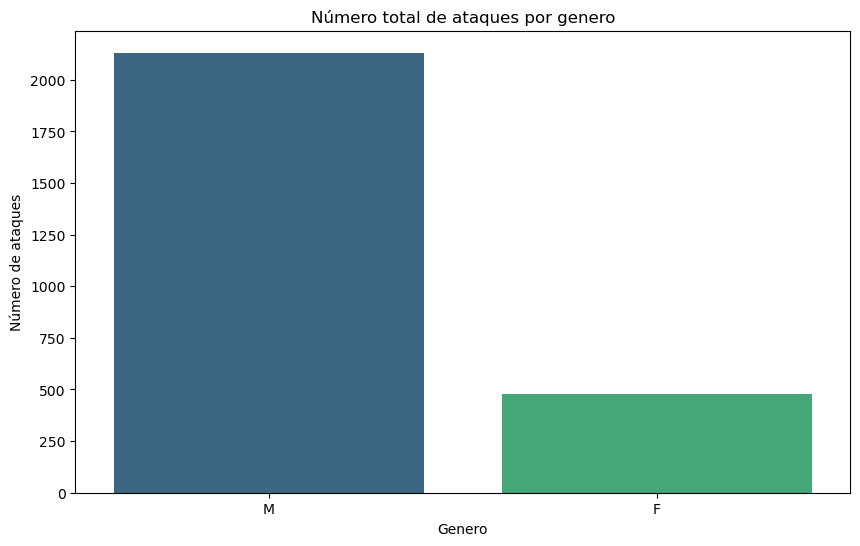

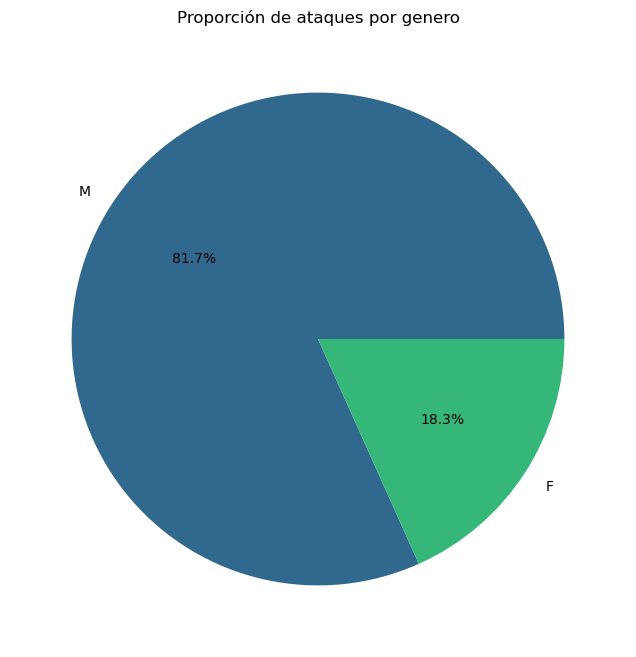

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los ataques válidos (Unprovoked o Provoked)
valid_attacks = df[df['type'].isin(['Unprovoked', 'Provoked'])]

# Contar ataques por genero
attack_counts_by_sex = valid_attacks['sex'].value_counts()

# Mostrar resultados
print("Número total de ataques por genero:")
print(attack_counts_by_sex)

# Verificar la proporción de ataques por genero
total_attacks = attack_counts_by_sex.sum()
attack_proportions = attack_counts_by_sex / total_attacks

print("\nProporción de ataques por genero:")
print(attack_proportions)

# Convertir los conteos a un DataFrame para visualización
attack_counts_df = attack_counts_by_sex.reset_index()
attack_counts_df.columns = ['sex', 'count']

# Gráfico de barras con Seaborn (sin advertencia)
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='count', data=attack_counts_df, palette='viridis', hue='sex', dodge=False)
plt.title('Número total de ataques por genero')
plt.xlabel('Genero')
plt.ylabel('Número de ataques')
plt.show()

# Gráfico de pastel con Matplotlib para proporciones
plt.figure(figsize=(8, 8))
plt.pie(attack_proportions, labels=attack_proportions.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(attack_proportions)))
plt.title('Proporción de ataques por genero')
plt.show()


Número de ataques por año:
year
1994     49
1995     72
1996     53
1997     53
1998     61
1999     62
2000     86
2001     84
2002     82
2003     87
2004     83
2005     93
2006     98
2007    108
2008    116
2009    115
2010    101
2011    123
2012    110
2013    121
2014    116
2015    141
2016    127
2017    134
2018    124
2019    111
2020     96
2021    107
2022     95
2023    106
2024     10
Name: count, dtype: int64


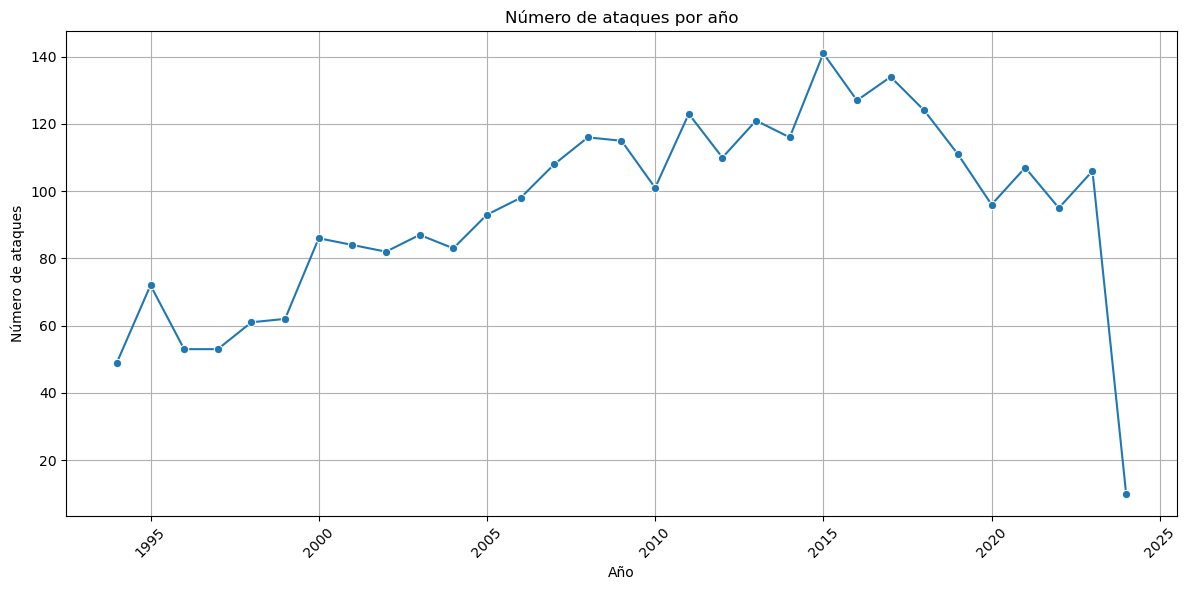

In [56]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contar ataques por año
attacks_by_year = df['year'].value_counts().sort_index()

# Mostrar resultados
print("Número de ataques por año:")
print(attacks_by_year)

# Convertir los conteos a un DataFrame para visualización
attacks_by_year_df = attacks_by_year.reset_index()
attacks_by_year_df.columns = ['Year', 'Count']

# Gráfico de líneas con Seaborn para ataques por año
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Count', data=attacks_by_year_df, marker='o')
plt.title('Número de ataques por año')
plt.xlabel('Año')
plt.ylabel('Número de ataques')
plt.grid(True)
plt.xticks(rotation=45)  # Rotea las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()

Número de ataques fatales por genero:
sex
M    237
F     38
Name: count, dtype: int64


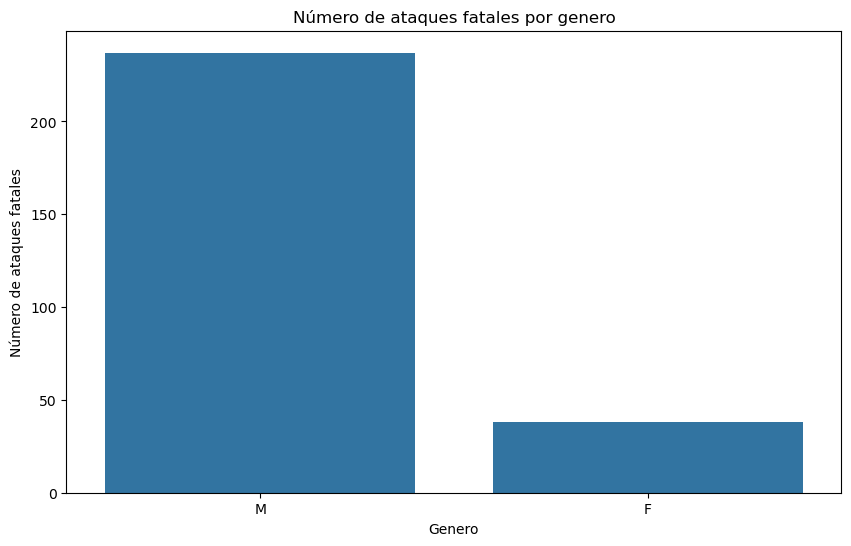

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df

# Estandariza los valores en la columna 'fatal attack: yes/no'
df['fatal attack: yes/no'] = df['fatal attack: yes/no'].str.upper().map({'Y': 'Yes', 'N': 'No'})

# Filtra el DataFrame para conservar solo las filas con ataques fatales
fatal_attacks = df[df['fatal attack: yes/no'] == 'Yes']

# Cuenta los ataques fatales por sexo
fatal_attacks_by_sex = fatal_attacks['sex'].value_counts()

# Convertir los conteos a un DataFrame para visualización
fatal_attacks_by_sex_df = fatal_attacks_by_sex.reset_index()
fatal_attacks_by_sex_df.columns = ['sex', 'count']

# Mostrar el conteo de ataques fatales por sexo
print("Número de ataques fatales por genero:")
print(fatal_attacks_by_sex)

# Gráfico de barras con Seaborn para ataques fatales por sexo
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='count', data=fatal_attacks_by_sex_df, errorbar=None)  # Eliminado el parámetro palette
plt.title('Número de ataques fatales por genero')
plt.xlabel('Genero')
plt.ylabel('Número de ataques fatales')
plt.show()
